import pandas as pd
dataset = pd.read_csv('Master_data_pure.csv')
print(dataset.head())

In [28]:
dataset.shape


(200, 6)

In [29]:
dataset.describe()


,Stimulus,Estimated,Error,Response Time,Previous Stimulus
count,200.000000,200.000000,200.000000,200.000000,199.000000
mean,3.055000,3.115000,0.250000,2.001734,3.045226
std,1.400637,1.360526,0.434099,1.473365,1.397315
min,1.000000,1.000000,0.000000,0.698193,1.000000
25%,2.000000,2.000000,0.000000,1.124684,2.000000
50%,3.000000,3.000000,0.000000,1.543999,3.000000
75%,4.000000,4.000000,0.250000,2.128056,4.000000
max,5.000000,5.000000,1.000000,8.377163,5.000000


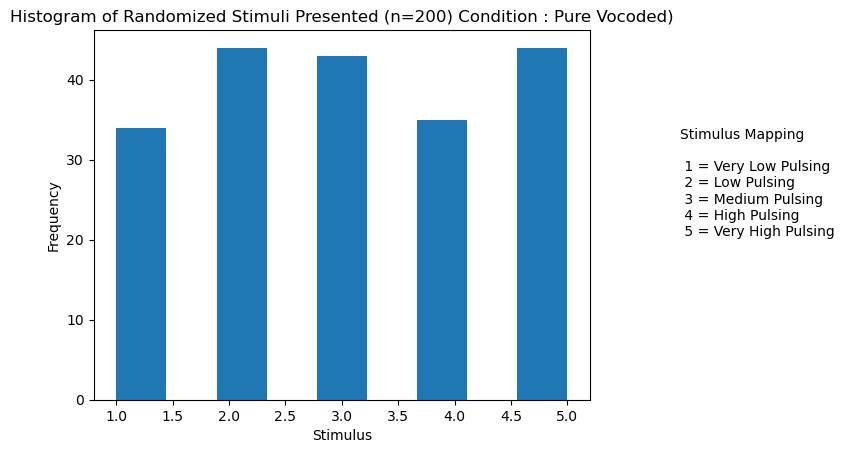

In [30]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm

# Plotting a histogram of distribution of stimuli

plt.hist(dataset['Stimulus'], bins='auto')
plt.xlabel('Stimulus')
plt.ylabel('Frequency')
plt.title('Histogram of Randomized Stimuli Presented (n=200) Condition : Pure Vocoded)')
plt.text(6, 20.5, "Stimulus Mapping \n\n 1 = Very Low Pulsing\n 2 = Low Pulsing\n 3 = Medium Pulsing\n 4 = High Pulsing \n 5 = Very High Pulsing ") 


plt.show()

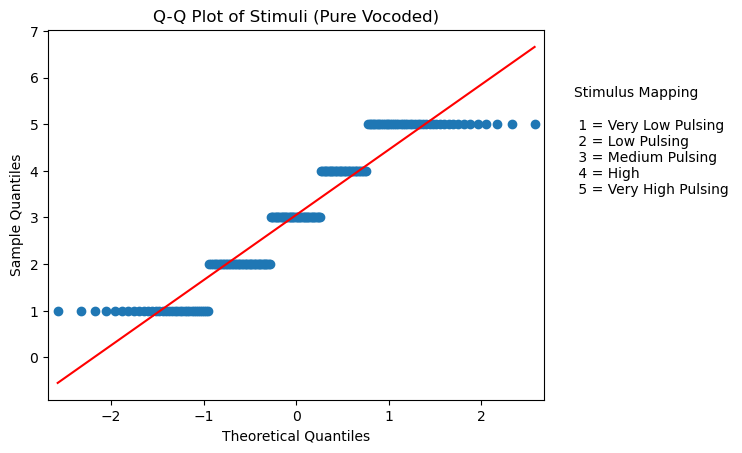

In [31]:
sm.qqplot(dataset['Stimulus'], line='s')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.title('Q-Q Plot of Stimuli (Pure Vocoded)')
plt.text(3, 3.5, "Stimulus Mapping \n\n 1 = Very Low Pulsing\n 2 = Low Pulsing\n 3 = Medium Pulsing\n 4 = High \n 5 = Very High Pulsing ")

plt.show()

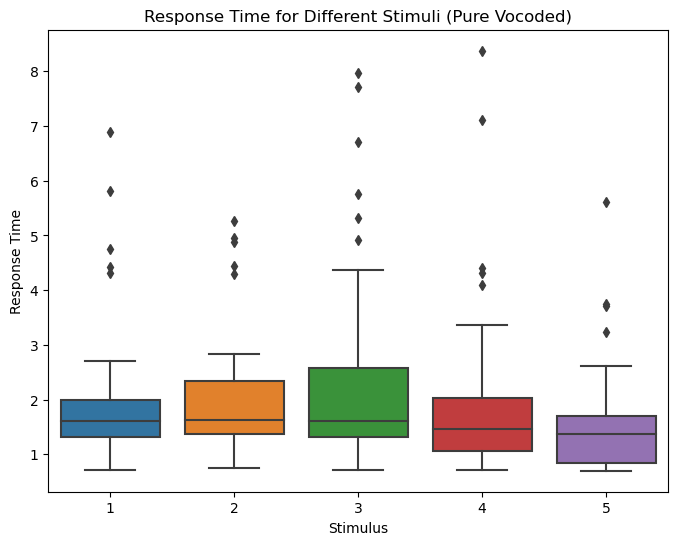

In [32]:
#Box plots: Create box plots to visualize the distribution of response time for each stimulus. 
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.boxplot(data=dataset, x='Stimulus', y='Response Time')
plt.xlabel('Stimulus')
plt.ylabel('Response Time')
plt.title('Response Time for Different Stimuli (Pure Vocoded)')
plt.show()

In [33]:
#Analysis of variance (ANOVA): ANOVA test to determine if there are significant differences in the mean response time
#across different stimulus categories. To identify if there are any statistically significant variations between the stimulus groups.

import scipy.stats as stats
#Descriptive statistics: Calculating descriptive statistics such as mean, median, standard deviation, minimum, and 
#maximum response time for each stimulus category. Summary of the response time distribution for each 
#stimulus groups will be 

stimulus_groups = dataset.groupby('Stimulus')
stimulus_stats = stimulus_groups['Response Time'].describe()
print(stimulus_stats)

# Perform one-way ANOVA
f_statistic, p_value = stats.f_oneway(*[group['Response Time'] for name, group in stimulus_groups])

alpha = 0.05
if p_value < alpha:
    print("There are significant differences in response time across different stimuli.")
else:
    print("There are no significant differences in response time across different stimuli.")


          count      mean       std       min       25%       50%       75%  \
Stimulus                                                                      
1          34.0  2.066816  1.467343  0.720064  1.318448  1.616130  1.994430   
2          44.0  2.011769  1.133061  0.753627  1.376993  1.627825  2.334539   
3          43.0  2.361766  1.862637  0.706230  1.314941  1.604023  2.570999   
4          35.0  2.063874  1.738059  0.718526  1.059608  1.453960  2.031227   
5          44.0  1.540128  0.989197  0.698193  0.836096  1.360581  1.706606   

               max  
Stimulus            
1         6.898385  
2         5.265180  
3         7.976689  
4         8.377163  
5         5.613080  
There are no significant differences in response time across different stimuli.


In [34]:
p_value

0.13399870913481357

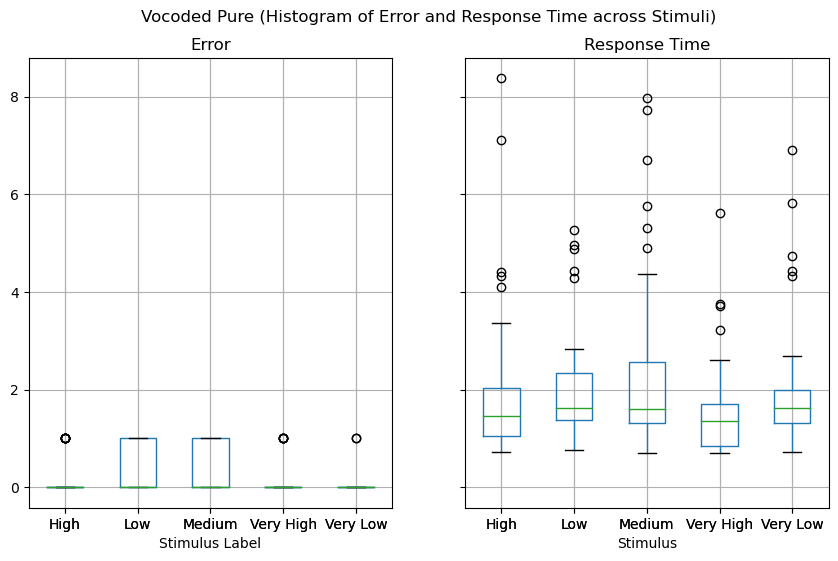

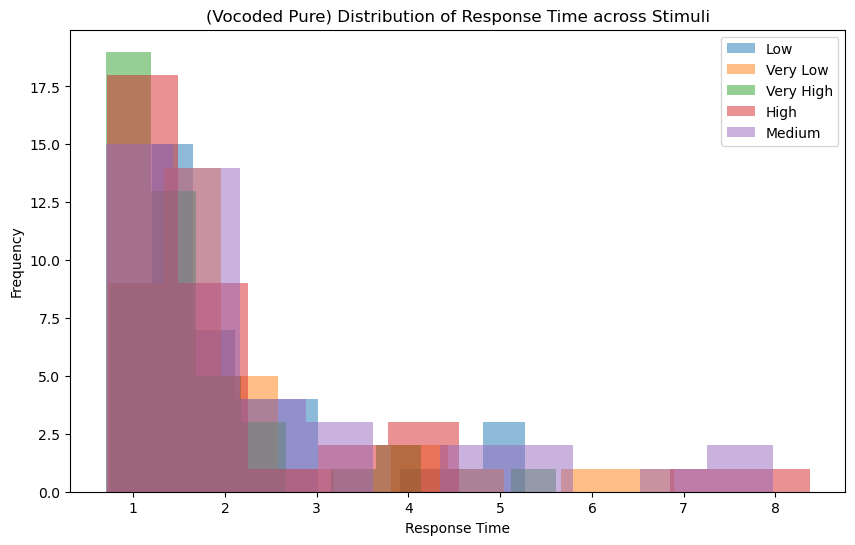

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Master_data_pure.csv')

# Dataset is loaded into a DataFrame named 'df'
grouped_data = df.groupby('Stimulus')
summary_stats = grouped_data[['Error', 'Response Time']].describe()

# Map stimulus values to labels
stimulus_labels = {
    1: 'Very Low',
    2: 'Low',
    3: 'Medium',
    4: 'High',
    5: 'Very High'
}

# Box plots for Error and Response Time
df['Stimulus Label'] = df['Stimulus'].map(stimulus_labels)
df.boxplot(column=['Error', 'Response Time'], by='Stimulus Label', figsize=(10, 6))
#plt.title('Distribution of Error and Response Time across Stimuli')
plt.xlabel('Stimulus')
plt.ylabel('Value')
plt.suptitle('Vocoded Pure (Histogram of Error and Response Time across Stimuli)')  # Remove the default title
plt.show()

stimuli = df['Stimulus'].unique()
# Histograms for Error
#plt.figure(figsize=(10, 6))
for stimulus in stimuli:
    stimulus_data = df[df['Stimulus'] == stimulus]['Error']
    #plt.hist(stimulus_data, bins=10, alpha=0.5, label=stimulus_labels[stimulus])

#plt.title('Distribution of Error across Stimuli')
#plt.xlabel('Error')
#plt.ylabel('Frequency')
#plt.legend()
#plt.show()

# Histograms for Response Time
plt.figure(figsize=(10, 6))
for stimulus in stimuli:
    stimulus_data = df[df['Stimulus'] == stimulus]['Response Time']
    plt.hist(stimulus_data, bins=10, alpha=0.5, label=stimulus_labels[stimulus])

plt.title('(Vocoded Pure) Distribution of Response Time across Stimuli')
plt.xlabel('Response Time')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [36]:
#Analysis of variance (ANOVA): ANOVA test to determine if there are significant differences in the mean error
#across different stimulus categories. To identify if there are any statistically significant variations between the stimulus groups.

import scipy.stats as stats

# Perform one-way ANOVA
f_statistic, p_value = stats.f_oneway(*[group['Error'] for name, group in stimulus_groups])

alpha = 0.05
if p_value < alpha:
    print("There are significant differences in error across different stimuli.")
else:
    print("There are no significant differences in error across different stimuli.")



There are significant differences in error across different stimuli.


In [37]:
p_value

3.7742866464604986e-05

In [16]:
#Analysis of variance (ANOVA): ANOVA test to determine if there are significant differences in the mean response time
#across different stimulus categories. To identify if there are any statistically significant variations between the stimulus groups.

import scipy.stats as stats

# Perform one-way ANOVA
f_statistic, p_value = stats.f_oneway(*[group['Response Time'] for name, group in stimulus_groups])

alpha = 0.05
if p_value < alpha:
    print("There are significant differences in response time across different stimuli.")
else:
    print("There are no significant differences in response time across different stimuli.")


There are no significant differences in response time across different stimuli.


In [17]:
p_value

0.13399870913481357

In [18]:
# Here I analyze the relationship between the "Error" column and the previous stimuli in dataset, I examine the data based 
#on the sequence of stimuli. Created a lagged column: Created a new column in dataset that represents the previous stimulus for each row. 
#This was achieved by shifting the values in the "Stimulus" column by one position.
dataset['Previous Stimulus'] = dataset['Stimulus'].shift(1)
#Group data and statistics Data grouped by "Previous Stimulus" column and mean calculated
grouped_data = dataset.groupby('Previous Stimulus')['Error'].mean()
print(grouped_data)

Previous Stimulus
1.0    0.235294
2.0    0.272727
3.0    0.279070
4.0    0.342857
5.0    0.139535
Name: Error, dtype: float64


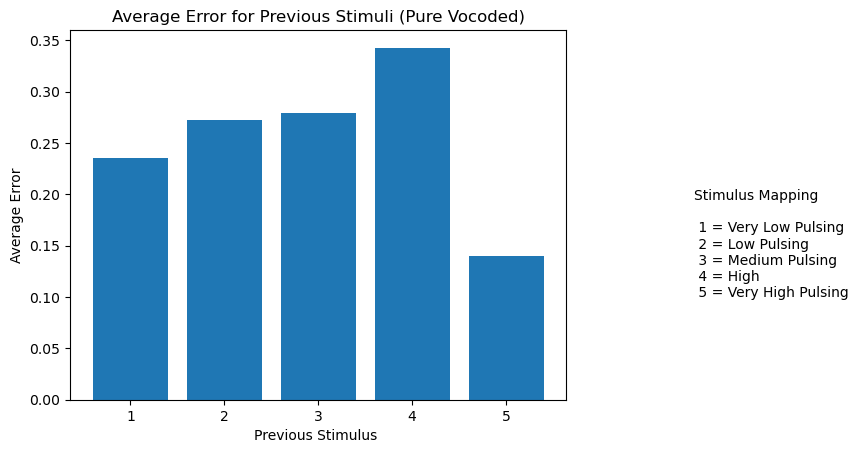

In [19]:
plt.bar(grouped_data.index, grouped_data)
plt.xlabel('Previous Stimulus ')
plt.ylabel('Average Error')
plt.title('Average Error for Previous Stimuli (Pure Vocoded)')
plt.text(7,0.1,"Stimulus Mapping \n\n 1 = Very Low Pulsing\n 2 = Low Pulsing\n 3 = Medium Pulsing\n 4 = High \n 5 = Very High Pulsing ")
plt.show()

In [20]:
#To determine if the error is influenced by the previous stimuli in dataset.
#
grouped_data = dataset.groupby(['Previous Stimulus', 'Stimulus'])['Error'].mean()
print(grouped_data)

Previous Stimulus  Stimulus
1.0                1           0.200000
                   2           0.333333
                   3           0.000000
                   4           0.750000
                   5           0.090909
2.0                1           0.000000
                   2           0.666667
                   3           0.300000
                   4           0.111111
                   5           0.181818
3.0                1           0.166667
                   2           0.416667
                   3           0.166667
                   4           0.333333
                   5           0.142857
4.0                1           0.000000
                   2           0.714286
                   3           0.666667
                   4           0.000000
                   5           0.142857
5.0                1           0.000000
                   2           0.333333
                   3           0.307692
                   4           0.000000
            

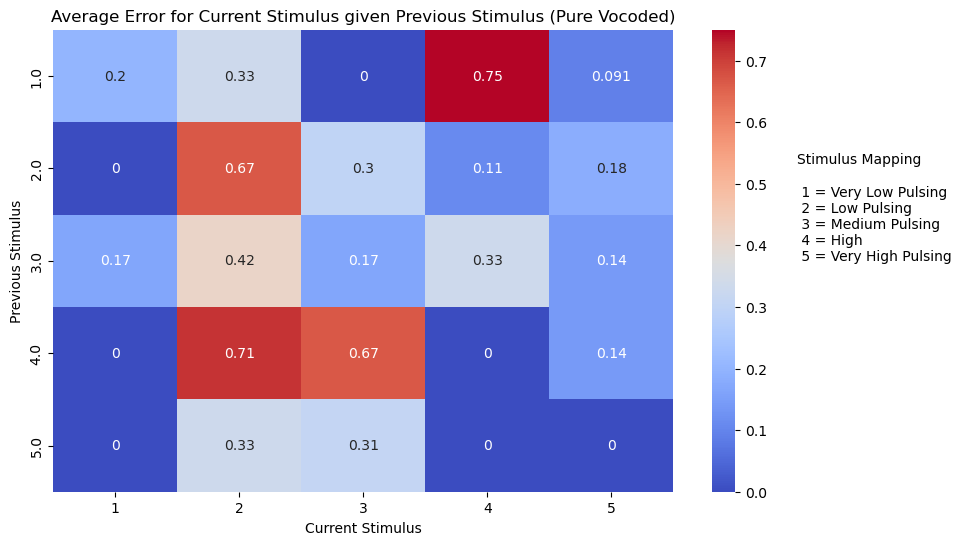

In [25]:
import seaborn as sns

# Reshape the data for plotting
heatmap_data = grouped_data.unstack()

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', cbar=True)
plt.xlabel('Current Stimulus')
plt.ylabel('Previous Stimulus')
plt.title('Average Error for Current Stimulus given Previous Stimulus (Pure Vocoded)')
plt.text(6.0,2.5,"Stimulus Mapping \n\n 1 = Very Low Pulsing\n 2 = Low Pulsing\n 3 = Medium Pulsing\n 4 = High \n 5 = Very High Pulsing")
plt.show()



